In [2]:
%matplotlib inline

/home/fantasyfish/miniconda2/envs/animation/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/fantasyfish/miniconda2/envs/animation/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


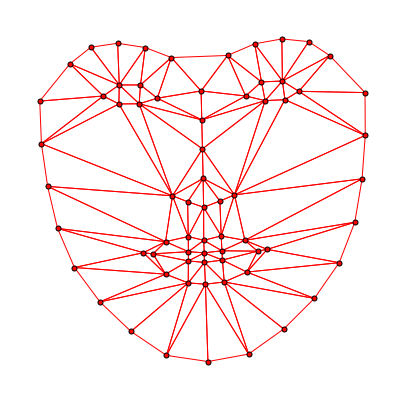

In [3]:
import menpo.io as mio
from menpo.landmark import labeller, face_ibug_68_to_face_ibug_68_trimesh
from menpofit.aam import HolisticAAM
#from menpo.feature import fast_dsift

def process(image, crop_proportion=0.2, max_diagonal=400):
    if image.n_channels == 3:
        image = image.as_greyscale()
    image = image.crop_to_landmarks_proportion(crop_proportion)
    d = image.diagonal()
    if d > max_diagonal:
        image = image.rescale(float(max_diagonal) / d)
    labeller(image, 'PTS', face_ibug_68_to_face_ibug_68_trimesh)
    return image

path_to_images = '../../../data/lfpw/trainset/'
training_images = mio.import_images(path_to_images, verbose=True)
training_images = training_images.map(process)


aam = HolisticAAM(training_images, group='face_ibug_68_trimesh', diagonal=150,
                  scales=(0.5, 1.0), verbose=True,
                  max_shape_components=16, max_appearance_components=104)
aam.view_shape_models_widget()

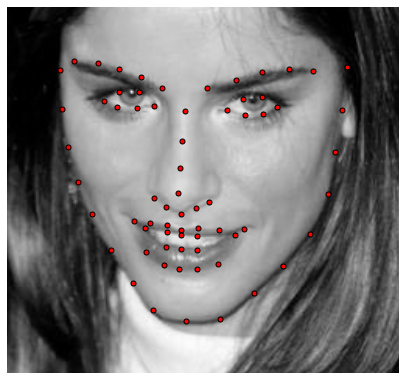

In [5]:
from menpowidgets import visualize_images
visualize_images(training_images)

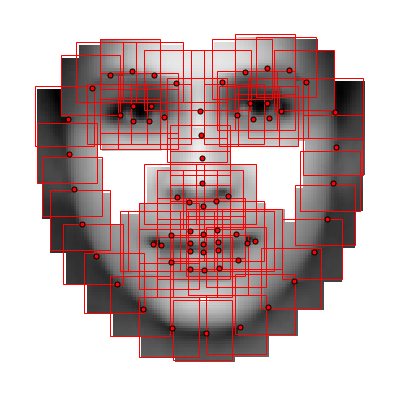

In [6]:
from menpofit.aam import PatchAAM
patch_aam = PatchAAM(training_images, group='PTS', patch_shape=[(15, 15), (23, 23)],
                     diagonal=150, scales=(0.5, 1.0),
                     max_shape_components=20, max_appearance_components=150,
                     verbose=True)
patch_aam.view_appearance_models_widget()

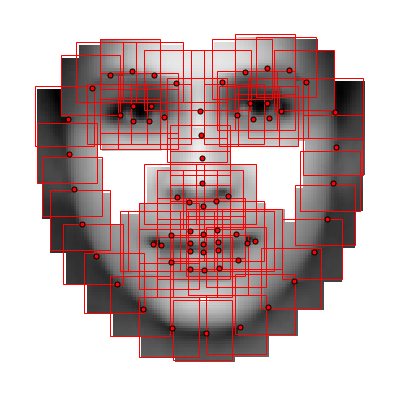

In [7]:
patch_aam.view_aam_widget()

In [8]:
from menpofit.aam import LucasKanadeAAMFitter, WibergInverseCompositional

fitter = LucasKanadeAAMFitter(patch_aam, lk_algorithm_cls=WibergInverseCompositional,
                              n_shape=[5, 20], n_appearance=[30, 150])

In [9]:
print(fitter)

Patch-based Active Appearance Model
 - Images scaled to diagonal: 150.00
 - No image warping performed
 - Scales: [0.5, 1.0]
   - Scale 0.5
     - Holistic feature: no_op
     - Appearance model class: PCAModel
       - 150 appearance components
     - Shape model class: OrthoPDM
       - 20 shape components
       - 4 similarity transform parameters
     - Patch shape: (15, 15)
   - Scale 1.0
     - Holistic feature: no_op
     - Appearance model class: PCAModel
       - 150 appearance components
     - Shape model class: OrthoPDM
       - 20 shape components
       - 4 similarity transform parameters
     - Patch shape: (23, 23)
Wiberg Inverse Compositional Algorithm
 - Scales: [0.5, 1.0]
   - Scale 0.5
     - 5 active shape components
     - 4 similarity transform components
     - 30 active appearance components
   - Scale 1.0
     - 20 active shape components
     - 4 similarity transform components
     - 150 active appearance components
    


In [10]:
from pathlib import Path
import menpo.io as mio

path_to_lfpw = Path('../../data/lfpw/testset/')

image = mio.import_image(path_to_lfpw / 'image_0018.png')
image = image.as_greyscale()

1 detected faces.


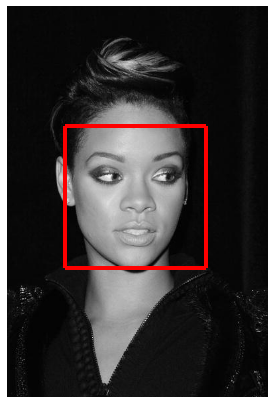

In [11]:
from menpodetect import load_dlib_frontal_face_detector

# Load detector
detect = load_dlib_frontal_face_detector()

# Detect
bboxes = detect(image)
print("{} detected faces.".format(len(bboxes)))

# View
if len(bboxes) > 0:
    image.view_landmarks(group='dlib_0', line_colour='red',
                         render_markers=False, line_width=4);

In [12]:
# initial bbox
initial_bbox = bboxes[0]

# fit image
result = fitter.fit_from_bb(image, initial_bbox, max_iters=[15, 5],
                            gt_shape=image.landmarks['PTS'].lms)

# print result
print(result)

/home/fantasyfish/miniconda2/envs/animation/lib/python3.5/site-packages/menpo/shape/pointcloud.py:261: MenpoDeprecationWarning: The .lms property is deprecated. LandmarkGroups are now shapes themselves - so you can use them directly anywhere you previously used .lms.Simply remove ".lms" from your code and things will work as expected (and this warning will go away)
  MenpoDeprecationWarning)


Fitting result of 68 landmark points.
Initial error: 0.1689
Reconstructed initial error: 0.1689
Final error: 0.0946


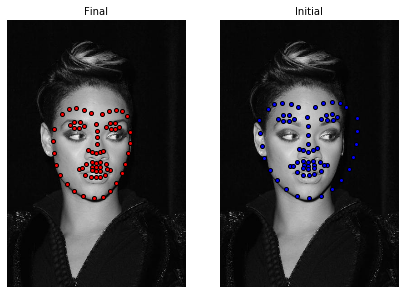

In [13]:
result.view(render_initial_shape=True)

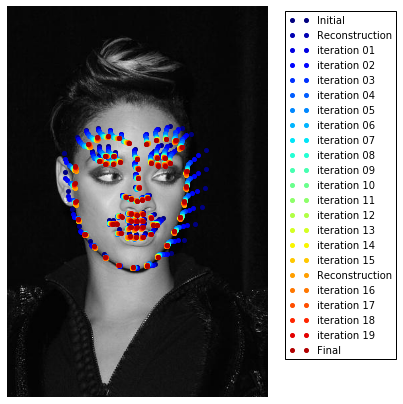

In [14]:
result.view_iterations()

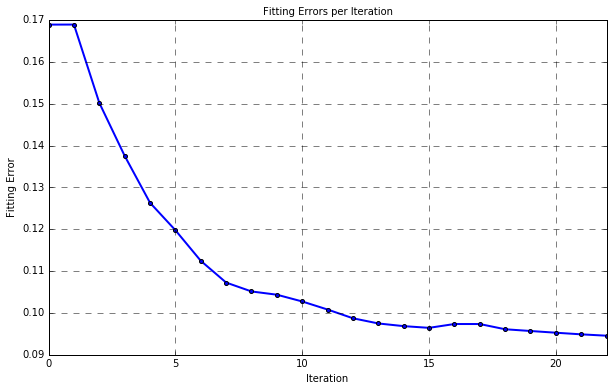

In [15]:
result.plot_errors()

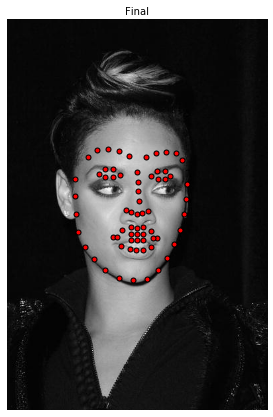

In [28]:
result.view_widget()

In [17]:
result.shapes

[PointCloud: n_points: 68, n_dims: 2,
 PointCloud: n_points: 68, n_dims: 2,
 PointCloud: n_points: 68, n_dims: 2,
 PointCloud: n_points: 68, n_dims: 2,
 PointCloud: n_points: 68, n_dims: 2,
 PointCloud: n_points: 68, n_dims: 2,
 PointCloud: n_points: 68, n_dims: 2,
 PointCloud: n_points: 68, n_dims: 2,
 PointCloud: n_points: 68, n_dims: 2,
 PointCloud: n_points: 68, n_dims: 2,
 PointCloud: n_points: 68, n_dims: 2,
 PointCloud: n_points: 68, n_dims: 2,
 PointCloud: n_points: 68, n_dims: 2,
 PointCloud: n_points: 68, n_dims: 2,
 PointCloud: n_points: 68, n_dims: 2,
 PointCloud: n_points: 68, n_dims: 2,
 PointCloud: n_points: 68, n_dims: 2,
 PointCloud: n_points: 68, n_dims: 2,
 PointCloud: n_points: 68, n_dims: 2,
 PointCloud: n_points: 68, n_dims: 2,
 PointCloud: n_points: 68, n_dims: 2,
 PointCloud: n_points: 68, n_dims: 2,
 PointCloud: n_points: 68, n_dims: 2]

In [24]:
print(len(result.shape_parameters))
print(len(result.shape_parameters[0]))

22
9


In [26]:
print(len(result.appearance_parameters))
print(len(result.appearance_parameters[0]))

22
30


In [27]:
result.gt_shape

PointCloud: n_points: 68, n_dims: 2

In [37]:
#KB-2K dataset
path_to_lfpw = Path('../../data/lfpw/001.png')

image = mio.import_image(path_to_lfpw)
image = image.as_greyscale()

1 detected faces.


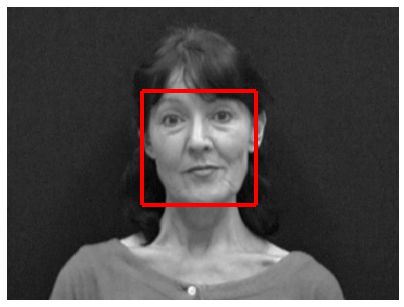

In [38]:
# Load detector
detect = load_dlib_frontal_face_detector()

# Detect
bboxes = detect(image)
print("{} detected faces.".format(len(bboxes)))

# View
if len(bboxes) > 0:
    image.view_landmarks(group='dlib_0', line_colour='red',
                         render_markers=False, line_width=4);

In [40]:
# initial bbox
initial_bbox = bboxes[0]

# fit image
result = fitter.fit_from_bb(image, initial_bbox, max_iters=[15, 5])

# print result
print(result)

Fitting result of 68 landmark points.


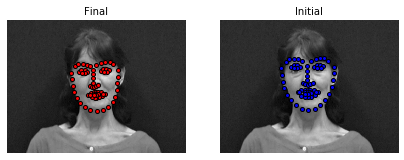

In [41]:
result.view(render_initial_shape=True)

In [43]:
recon_images = aam.appearance_reconstructions(result.appearance_parameters, result.n_iters_per_scale)

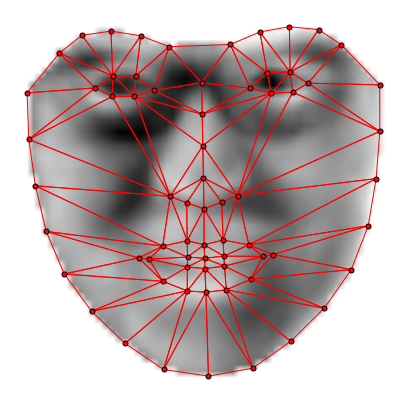

In [44]:
visualize_images(recon_images)